In [1]:
import os
from typing import Optional

import torch
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

from tools.metrics import rps
from tools.utils import ensure_dir
from tools.plotter import activate_latex, deactivate_latex

SANS_SERIF = True

/home/abthuy/anaconda3/envs/qde_ordinal/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [90]:
def plot_rps(
    y_true: torch.Tensor,
    y_pred: torch.Tensor,
    print_score: bool = True,
    savename: Optional[str] = None,
) -> float:
    """Plot the ranked Probability Score (RPS) for ordinal regression.

    Parameters
    ----------
    y_true : ArrayLike
        True labels of shape () or (N)
    y_pred : ArrayLike
        Predicted probabilities of shape (C) or (N,C).
    """
    y_true_scalar = y_true
    y_true = torch.nn.functional.one_hot(y_true, num_classes=y_pred.shape[-1])
    assert y_true.shape == y_pred.shape, "Shapes of y_true and y_pred must match."

    cum_y_true = torch.cumsum(y_true, axis=-1)[0, :].numpy() * 100
    cum_y_pred = torch.cumsum(y_pred, axis=-1)[0, :].numpy() * 100

    # plot distributions as barplot
    _, ax = plt.subplots(1, 1, figsize=(5, 3))
    arc_levels = [
        "level 3",
        "level 4",
        "level 5",
        "level 6",
        "level 7",
        "level 8",
        "level 9",
    ]
    ax.step(arc_levels, cum_y_true, label="Ground truth", where="mid", color="black")
    ax.step(arc_levels, cum_y_pred, label="Prediction", color="blue", where="mid")
    ax.fill_between(
        arc_levels, cum_y_true, cum_y_pred, color="red", alpha=0.1, step="mid"
    )

    # Add bidirectional arrows between the lines
    for _, (x, y_t, y_p) in enumerate(zip(arc_levels, cum_y_true, cum_y_pred)):
        # Only add arrows where there's a meaningful difference
        if abs(y_t - y_p) > 0:  # Adjust threshold as needed
            ax.annotate(
                "",
                xy=(x, y_t),
                xytext=(x, y_p),
                arrowprops=dict(arrowstyle="<->", color="red", lw=1),
            )

    # show RPS score
    if print_score:
        props = dict(boxstyle="round", facecolor="white", alpha=0.5)
        rps_score = rps(torch.as_tensor(y_true_scalar), torch.as_tensor(y_pred))
        ax.text(
            0.03,
            0.72,
            (r"$\mathrm{DRPS} = " f"{rps_score:.2f}" r"$"),
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment="top",
            bbox=props,
        )

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel("Cumulative Probability")
    ax.set_xlabel("Difficulty level")
    ax.legend()
    ax.grid(linestyle="--")
    # get ticks in sans-serif if sans-serif is used
    if savename is not None:
        plt.tight_layout()
        ensure_dir(os.path.dirname(savename))
        plt.savefig(savename)
    plt.show()

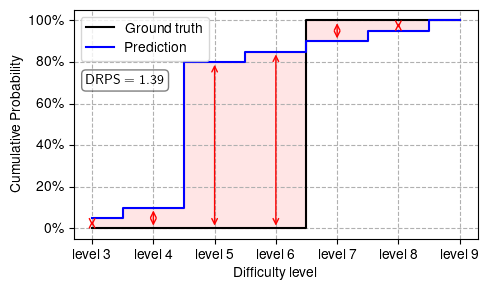

In [97]:
y_true = torch.tensor([4])
y_pred = torch.tensor([[0.05, 0.05, 0.70, 0.05, 0.05, 0.05, 0.05]])
fname = os.path.join("output", "figures", "rps", "drps_example_ordinal_certain.pdf")
# fname = None

activate_latex(sans_serif=SANS_SERIF)
########
plot_rps(y_true=y_true, y_pred=y_pred, savename=fname)
########
deactivate_latex()

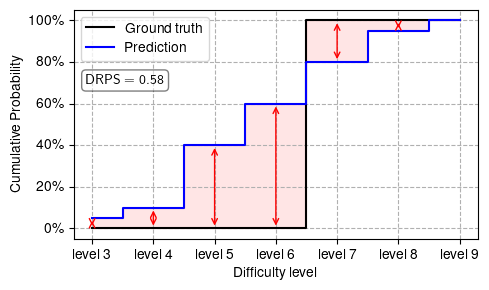

In [98]:
y_true = torch.tensor([4])
y_pred = torch.tensor([[0.05, 0.05, 0.30, 0.20, 0.20, 0.15, 0.05]])
fname = os.path.join("output", "figures", "rps", "drps_example_ordinal_uncertain.pdf")
# fname = None

activate_latex(sans_serif=SANS_SERIF)
########
plot_rps(y_true=y_true, y_pred=y_pred, savename=fname)
########
deactivate_latex()

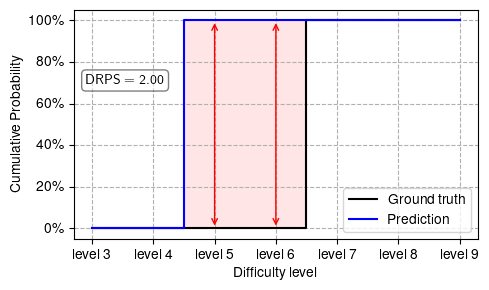

In [94]:
y_true = torch.tensor([4])
y_pred = torch.tensor([[0, 0, 1, 0, 0, 0, 0]])
fname = os.path.join("output", "figures", "rps", "drps_example_regression_minus2.pdf")
# fname = None

activate_latex(sans_serif=SANS_SERIF)
########
plot_rps(y_true=y_true, y_pred=y_pred, savename=fname)
########
deactivate_latex()

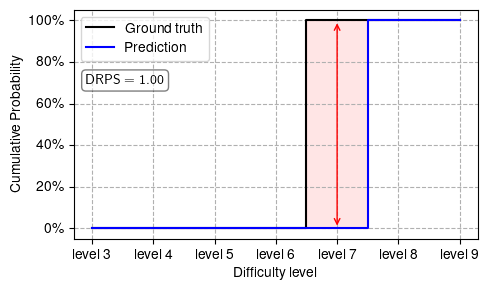

In [96]:
y_true = torch.tensor([4])
y_pred = torch.tensor([[0, 0, 0, 0, 0, 1, 0]])
fname = os.path.join("output", "figures", "rps", "drps_example_regression_plus1.pdf")
# fname = None

activate_latex(sans_serif=SANS_SERIF)
########
plot_rps(y_true=y_true, y_pred=y_pred, savename=fname)
########
deactivate_latex()